In [ ]:
# coding: utf-8

In [ ]:
#《学Python量量化，通往财务⾃自由》| 选股实战之CAPM模型

In [1]:
import pandas as pd
import tushare as ts
# 获取数据
pro = ts.pro_api()
wanke = pro.daily(ts_code='000002.SZ', start_date='20170101') 
pingan = pro.daily(ts_code='601318.SH', start_date='20170101') 
maotai = pro.daily(ts_code='600519.SH', start_date='20170101') 
wanhua = pro.daily(ts_code='002415.SZ', start_date='20170101')
keda = pro.daily(ts_code='002230.SZ', start_date='20170101')
hs300 = pro.index_daily(ts_code='000300.SH', start_date='20170101') 
# 仅保留留收益率数据，且⽤用⽇日期作为index
# 然后按照⽇日期排序(增序)
stock_list = [wanke, pingan, maotai, wanhua, keda, hs300] 
for stock in stock_list:
 stock.index = pd.to_datetime(stock.trade_date)
df = pd.concat([stock.pct_chg / 100 for stock in stock_list], axis=1)
df.columns = ['wanke', 'pingan', 'maotai', 'wanhua', 'keda', 'hs300']
df = df.sort_index(ascending=True)
df.describe()

,wanke,pingan,maotai,wanhua,keda,hs300
count,519.000000,524.000000,524.000000,524.000000,524.000000,524.000000
mean,0.001044,0.001569,0.001809,0.001836,0.001769,0.000257
std,0.025043,0.018701,0.019877,0.024585,0.030352,0.011001
min,-0.092593,-0.066100,-0.100000,-0.099861,-0.100177,-0.047990
25%,-0.012006,-0.008900,-0.009419,-0.011625,-0.013325,-0.005158
50%,-0.000896,0.000875,0.000380,0.001000,0.001211,0.000350
75%,0.010417,0.011297,0.013290,0.014580,0.015499,0.005492
max,0.100100,0.089227,0.082100,0.100157,0.100100,0.059477


In [2]:
df = df.fillna(0)
returns = (df + 1).product() - 1 
print('累计收益率:', returns)
print('标准差:', df.std())

累计收益率: wanke     0.463392
pingan    1.075902
maotai    1.325931
wanhua    1.234146
keda      0.986974
hs300     0.108543
dtype: float64
标准差: wanke     0.024923
pingan    0.018701
maotai    0.019877
wanhua    0.024585
keda      0.030352
hs300     0.011001
dtype: float64


In [3]:
import matplotlib.pyplot as plt
import matplotlib as mpl
#mpl.rcParams['font.family'] = 'sans-serif'
#mpl.rcParams['font.sans-serif'] = 'SimHei'
#import matplotlib
a = sorted([f.name for f in mpl.font_manager.fontManager.ttflist])
for i in a:
        print (i)

Bitstream Vera Sans
Bitstream Vera Sans
Bitstream Vera Sans
Bitstream Vera Sans
Bitstream Vera Sans Mono
Bitstream Vera Sans Mono
Bitstream Vera Sans Mono
Bitstream Vera Sans Mono
Bitstream Vera Serif
Bitstream Vera Serif
DejaVu Sans
DejaVu Sans
DejaVu Sans
DejaVu Sans
DejaVu Sans Display
DejaVu Sans Mono
DejaVu Sans Mono
DejaVu Sans Mono
DejaVu Sans Mono
DejaVu Serif
DejaVu Serif
DejaVu Serif
DejaVu Serif
DejaVu Serif Display
East Syriac Adiabene
East Syriac Ctesiphon
Estrangelo Antioch
Estrangelo Edessa
Estrangelo Midyat
Estrangelo Nisibin
Estrangelo Nisibin Outline
Estrangelo Quenneshrin
Estrangelo Talada
Estrangelo TurAbdin
Goha-Tibeb Zemen
Goha-Tibeb Zemen
Luxi Mono
Luxi Mono
Luxi Mono
Luxi Mono
Luxi Sans
Luxi Sans
Luxi Sans
Luxi Sans
Luxi Serif
Luxi Serif
Luxi Serif
Luxi Serif
STIXGeneral
STIXGeneral
STIXGeneral
STIXGeneral
STIXNonUnicode
STIXNonUnicode
STIXNonUnicode
STIXNonUnicode
STIXSizeFiveSym
STIXSizeFourSym
STIXSizeFourSym
STIXSizeOneSym
STIXSizeOneSym
STIXSizeThreeSym
STI

In [4]:
from matplotlib.font_manager import FontProperties
font=FontProperties(fname='/Library/Fonts/Hanzipen.ttc',size=10)
ax1.set_xticklabels(ability_labels,fontproperties=font)



NameError: name 'ax1' is not defined

/Volumes/QuantOsUSB/QuantOsUSB/kivy.app/Contents/Resources/venv/lib/python3.6/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))
/Volumes/QuantOsUSB/QuantOsUSB/kivy.app/Contents/Resources/venv/lib/python3.6/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


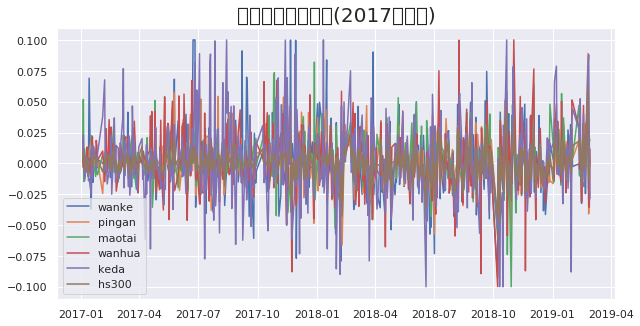

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
sns.set()
mpl.rcParams['font.family'] = 'sans-serif'
mpl.rcParams['font.sans-serif'] = 'SimHei'
plt.figure(figsize=(10, 5))
for col in df.columns:
 plt.plot(df[col], label=col) 
plt.title('⽇日收益率时序图(2017⾄至今)', fontsize=20) 
plt.legend();
plt.show()

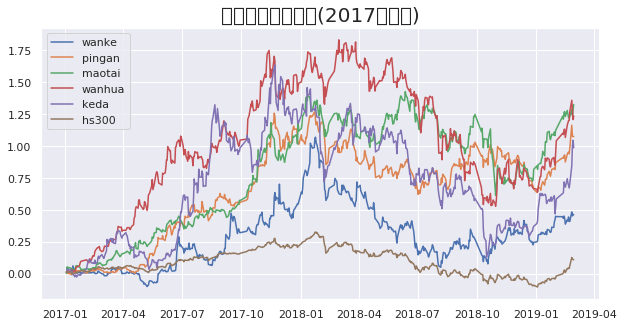

In [6]:
plt.figure(figsize=(10, 5))
for col in df.columns:
 plt.plot((df[col]+1).cumprod()-1, label=col) 
plt.title('累计收益率时序图(2017⾄至今)', fontsize=20) 
plt.legend();
plt.show()

In [7]:
rf = 1.032 ** (1/360) - 1
print(rf)

8.750012529978868e-05


In [8]:
df_rp = df - rf
df_rp.head()

,wanke,pingan,maotai,wanhua,keda,hs300
trade_date,,,,,,
2017-01-03,0.008712,0.007012,0.001112,0.018012,0.011012,0.009624
2017-01-04,0.005712,-0.000888,0.051812,-0.003388,0.022912,0.007717
2017-01-05,0.003712,0.002112,-0.014788,0.005712,0.003512,-0.000243
2017-01-06,-0.013988,-0.008188,0.011512,-0.008288,-0.011788,-0.006063
2017-01-09,0.000912,-0.000688,-0.006488,0.006512,0.005312,0.004762


/Volumes/QuantOsUSB/QuantOsUSB/kivy.app/Contents/Resources/venv/lib/python3.6/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


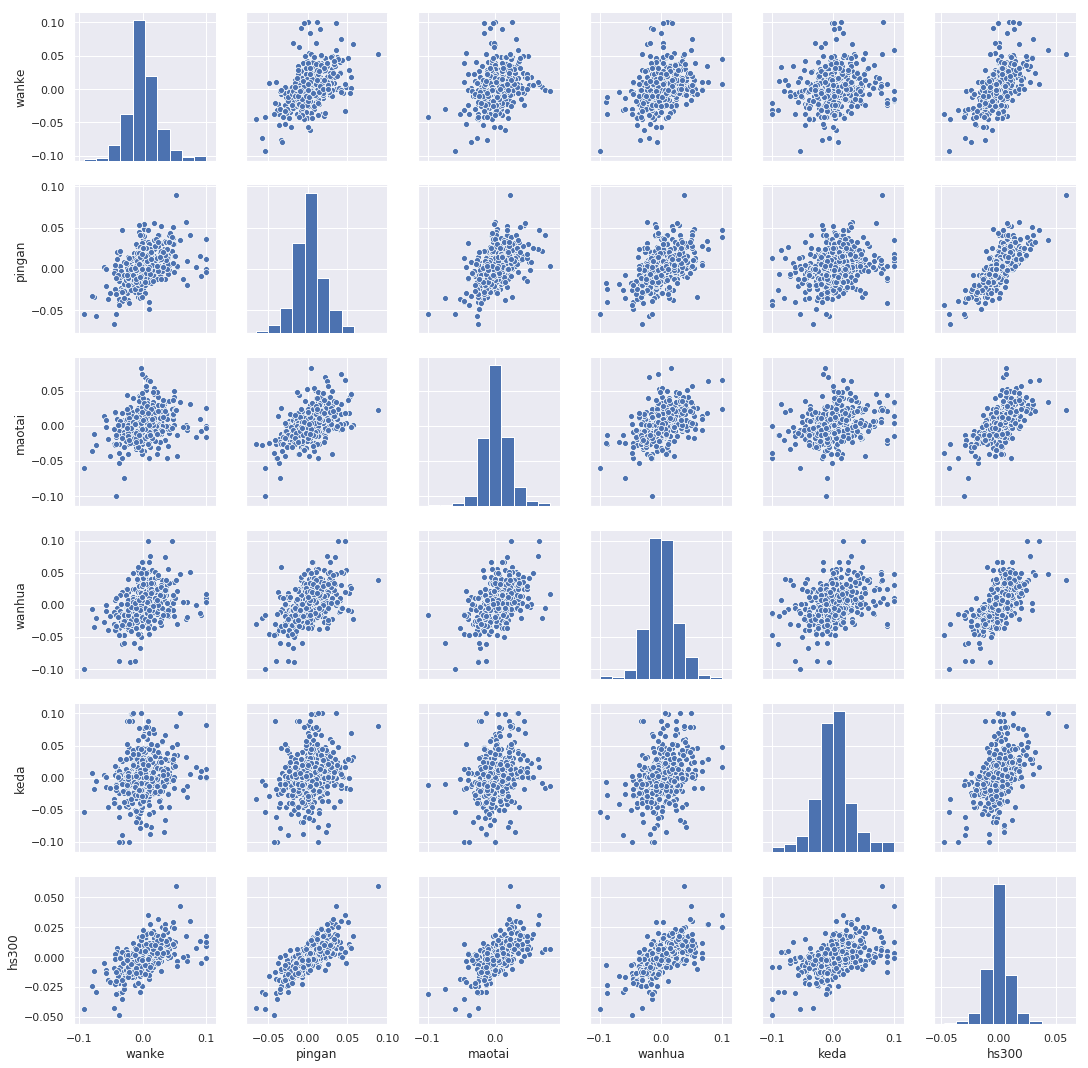

In [9]:
sns.pairplot(df_rp);
plt.show()

In [10]:
import statsmodels.api as sm
stock_names = {
 'wanke': '万科A', 
 'pingan': '中国平安', 
 'maotai': '贵州茅台', 
 'wanhua': '万华化学', 
 'keda': '科大讯⻜'
}
for stock in ['wanke', 'pingan', 'maotai', 'wanhua', 'keda']:
    model = sm.OLS(df_rp[stock], sm.add_constant(df_rp['hs300']))
    result = model.fit()
    print(stock_names[stock] + '')
    print(result.summary())
    print('')

万科A
                            OLS Regression Results                            
Dep. Variable:                  wanke   R-squared:                       0.336
Model:                            OLS   Adj. R-squared:                  0.335
Method:                 Least Squares   F-statistic:                     264.1
Date:                Thu, 28 Feb 2019   Prob (F-statistic):           2.38e-48
Time:                        23:05:09   Log-Likelihood:                 1298.8
No. Observations:                 524   AIC:                            -2594.
Df Residuals:                     522   BIC:                            -2585.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0007      0.001      0.815     